In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [2]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


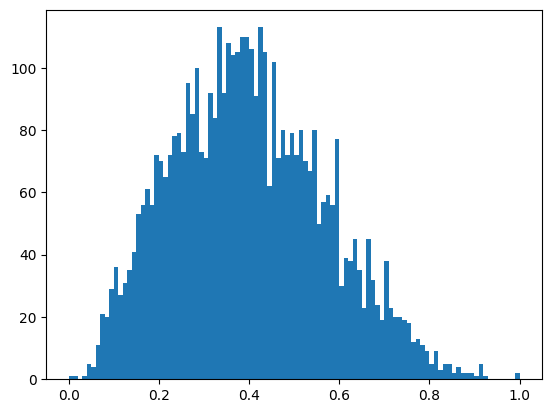

In [3]:
plt.hist(df.target, 100)
_ = plt.plot()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [5]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340762242646

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

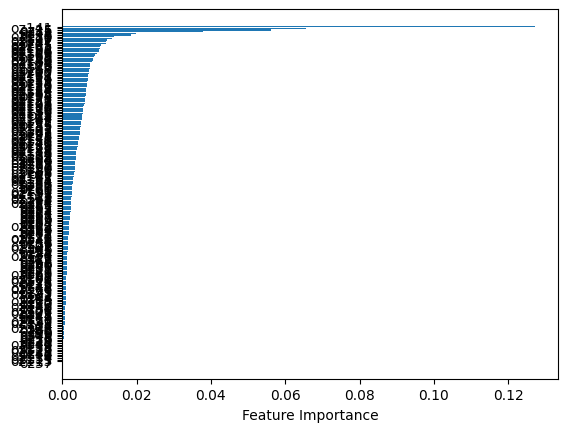

In [7]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [8]:
rf.feature_importances_[sort][-10:]

array([0.01179   , 0.01201346, 0.01334874, 0.01388866, 0.01851902,
       0.0198211 , 0.03800078, 0.05608997, 0.06555254, 0.12708483])

In [9]:
df.data.columns[sort][-10:]

Index(['oz47', 'oz197', 'oz112', 'oz20', 'oz137', 'oz18', 'oz48', 'oz35',
       'oz15', 'oz141'],
      dtype='object')

In [10]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz146,oz56,oz169,oz163,oz109,oz158,oz198,oz162,oz155,oz201,oz47,oz197,oz112,oz20,oz137,oz18,oz48,oz35,oz15,oz141
0,0.011997,0.126277,0.352613,0.059438,0.076923,0.800120,0.039213,0.319206,0.752291,0.127564,0.102941,0.505899,0.000000,0.000000,0.000000,0.0625,0.312855,0.0,0.000000,0.041308
1,0.025932,0.422015,0.352625,0.122765,0.153846,0.791224,0.326584,0.306084,0.745984,0.475618,0.389706,0.683820,0.222222,0.242424,0.278945,0.0625,0.297041,0.4,0.282828,0.212274
2,0.007666,0.000000,0.352400,0.153984,0.076923,0.798276,0.204885,0.406309,0.753298,0.497968,0.257353,0.499219,0.000000,0.388889,0.000000,0.1250,0.288557,0.0,0.388889,0.063643
3,0.021463,0.000000,0.352497,0.110089,0.076923,0.800965,0.023469,0.327848,0.767469,0.134458,0.198529,0.630533,0.000000,0.095238,0.039437,0.0000,0.310692,0.1,0.111111,0.031193
4,0.006780,0.000000,0.352417,0.075031,0.076923,0.802893,0.111398,0.329857,0.741548,0.295913,0.154412,0.516053,0.000000,0.260870,0.000000,0.0625,0.286581,0.0,0.304348,0.063643


In [11]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.3978618144747218

In [12]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 58)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.44381262022693313

In [14]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

In [16]:
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [18]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [19]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [20]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [21]:
y_train.value_counts()

,count
class,
R,216
L,215
B,37


In [22]:
X_train["target"] = y_train

In [23]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [24]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


In [25]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [26]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [27]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

<ipython-input-27-fe69465c1096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


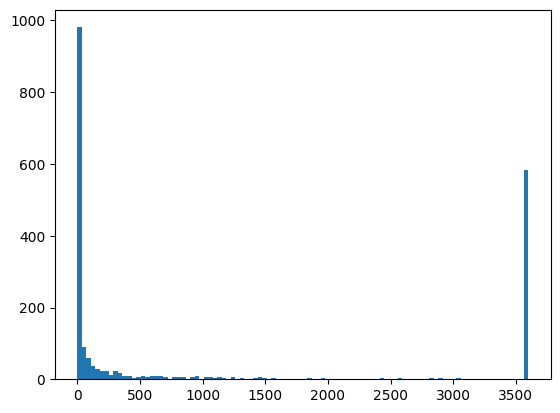

In [28]:
plt.hist(df.target, 100)
_ = plt.plot()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [30]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))

In [31]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
